In [4]:
from astropy.io import fits
from astropy.io import ascii
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
from musetools import io as io
from musetools import spec as s
import musetools.util as u
import musetools.modeling as m
from astropy.wcs import WCS
from lmfit import Model
import pdb
%matplotlib inline
import getpass

username=getpass.getuser()

if username == 'bordoloi':
	fitsfile = '/Users/bordoloi/Dropbox/MUSE/LensedArc/RCS0327_16mc_zap.fits'
else:
	fitsfile = '/home/ahmed/astro/data/RCS0327_16mc_zap.fits'

import importlib
importlib.reload(m)
info = ascii.read('/home/ahmed/astro/spectra/redshift.dat')
xcen = info[0][:]
ycen = info[1][:]
zgal = info[4][:]
for cx, cy, z in zip(xcen, ycen, zgal):
    data = ascii.read('/home/ahmed/astro/spectra/spectrum_tot_'+str(cx)+'_'+str(cy)+'.dat')
    wave = data[0][:]
    flx = data[1][:]
    flx_er = data[2][:]
    wrest = wave / (1. + z) 
    minindex = 2250
    maxindex = 2500
    wave = wave[minindex:maxindex]
    flx = flx[minindex:maxindex]
    flx_er = flx_er[minindex:maxindex]
    wrest = wrest[minindex:maxindex]
    ### Fitting Continuum
    minw = 7540.
    maxw = 7590.
    q = np.where((wave > minw) & (wave < maxw))
    wrest_fit = np.delete(wrest, q)
    flx_fit  = np.delete(flx, q)
    cont = np.poly1d(np.polyfit(wrest_fit, flx_fit, 3))  # Defining my polynomial
    continuum = cont(wrest)
    
    flx_norm = flx/continuum
    flx_er_norm = flx_er/continuum
    lam_center = [2796.351,2803.528]
    vel = u.veldiff(wrest,lam_center[0])
    dat = Table([wave, wrest, flx, flx_er, continuum, flx_norm, flx_er_norm],names=['wave','wrest','flux','flux_er','cont','flux_norm','flux_er_norm'])
    ascii.write(dat, '/home/ahmed/astro/spectra/spectrum_mg_newz_'+str(cx)+'_'+str(cy)+'.dat')
    '''
    fig, ax = plt.subplots(3)
    ax[0].step(wave,flx)
    ax[0].step(wave,flx_er)
    
    ax[1].step(wrest,flx)
    ax[1].step(wrest,continuum)
    ax[1].step(wrest,flx_er)
    
    ax[2].step(vel,flx_norm)
    ax[2].step(vel,flx_er_norm)
    plt.show()
    '''

parameters with new z
[-115.39673431   74.98399593    0.93071873    2.33904959    1.08510852
    0.83984963  161.98477687   96.94601465]
parameters eror with new z
[38.14974751 69.77565416  0.11594418  1.88062587  0.13200516  0.19549083
 31.6841057  32.77955959]
parameters with old z
[-182.25311843   -1.83665413    0.93849026    2.45473208    1.08012805
    0.85088266  160.6093849   103.40205286]
parameters eror with old z
[29.32653056 68.94622203  0.10658822  1.75708797  0.11612246  0.16438047
 27.56305259 31.22076747]


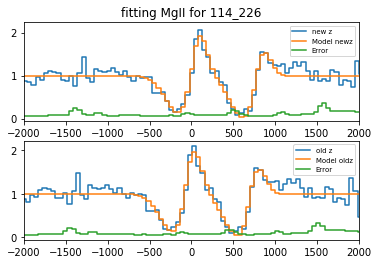

parameters with new z
[-97.47750315  65.05944661   1.04338121   5.67215848   0.96542028
   0.68862009 216.39761436 124.18213939]
parameters eror with new z
[1.38455349e+01 3.95962589e+01 3.11419384e-02 2.57514125e+00
 2.84405801e-02 1.04135380e-01 2.14051142e+01 1.98200963e+01]
parameters with old z
[-169.94656862   23.01667624    1.04526142    4.52975016    0.97283856
    0.70930543  209.2339199   114.89193643]
parameters eror with old z
[1.93795089e+01 4.02676593e+01 3.71060254e-02 2.27451852e+00
 3.43812096e-02 9.37438656e-02 2.32894542e+01 2.05333858e+01]


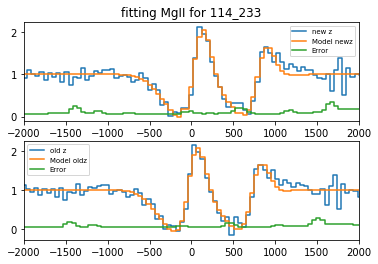

parameters with new z
[-183.6423158   125.60731818    0.909665      4.56124543    0.94132271
    0.71325759  219.18642765   67.23802258]
parameters eror with new z
[57.33565854 15.18661025  0.09485131  2.77655954  0.11126875  0.15250273
 48.06267244 13.3410093 ]
parameters with old z
[-216.57957785   79.39540915    0.94736039    4.97440514    0.9132949
    0.69961768  221.02370889   66.15115565]
parameters eror with old z
[50.02551062 14.3868356   0.09084241  2.8478038   0.1006741   0.15581556
 41.90860668 12.83439138]


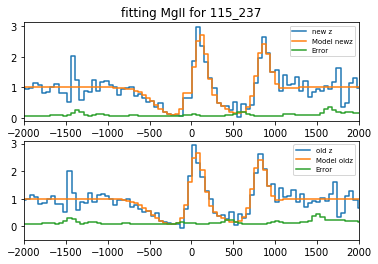

parameters with new z
[-76.15610528  19.3948486    1.00545837  15.70656312   1.01715573
   0.96434275 217.91228535  96.63464678]
parameters eror with new z
[8.22583630e+00 1.28725111e+01 1.03523821e-02 3.19057875e+00
 1.09295350e-02 1.01388637e-01 1.22180445e+01 7.04713990e+00]
parameters with old z
[-124.19683647  -28.2068889     1.00543169   15.57751625    1.0170437
    0.96632168  218.91742017   97.47533312]
parameters eror with old z
[8.32794262e+00 1.30094088e+01 1.04417529e-02 3.22661584e+00
 1.10367761e-02 1.04337681e-01 1.24514429e+01 7.15877872e+00]


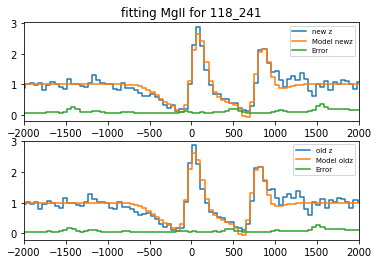

parameters with new z
[-100.01487439   68.50619208    1.0163308     8.39648034    1.09457216
    1.14665957  165.75845616   60.56821378]
parameters eror with new z
[18.21345719 17.71499466  0.0582629   3.22771224  0.09704282  0.11824409
 17.28670516  9.06668241]
parameters with old z
[-136.1903617    30.92595043    1.01729503    8.39764867    1.09519943
    1.14572104  162.9899261    60.86135236]
parameters eror with old z
[17.56366279 17.29855896  0.05571796  3.14833224  0.09443755  0.11174511
 16.98623557  8.74455794]


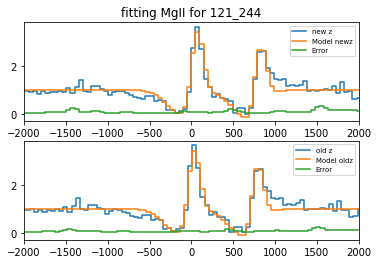

parameters with new z
[-123.24364631   52.14020874    0.96977538    9.06134769    1.11192466
    1.09807783  177.50544772   60.09981593]
parameters eror with new z
[20.22795585 15.43239384  0.06991216  3.34848647  0.10365953  0.10913862
 15.83512676  7.79313028]
parameters with old z
[-136.01260473   38.12537635    0.97021317    8.98964574    1.11566473
    1.09741043  172.51501673   60.25264685]
parameters eror with old z
[19.36902647 14.95986791  0.06801222  3.20503115  0.10322243  0.10268008
 15.72208299  7.47157942]


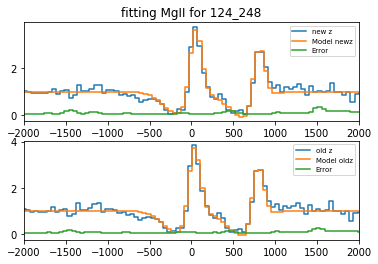

parameters with new z
[-97.09280115  66.33611202   0.92188473   7.93985563   1.1590027
   1.21819423 164.19693964  62.57800445]
parameters eror with new z
[23.37025837 18.94230921  0.09660884  3.47221456  0.15495396  0.13856959
 18.57740954  8.94472621]
parameters with old z
[-124.21865908   37.60940014    0.92222807    7.99610531    1.15934322
    1.20895323  161.55091671   62.83374172]
parameters eror with old z
[22.94829102 19.00434491  0.0954327   3.48383819  0.15459559  0.13372015
 18.52086249  8.83736263]


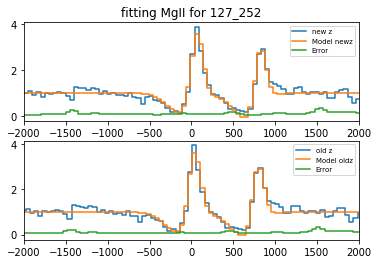

parameters with new z
[-80.14154687  22.38302898   1.01026226  12.47326717   1.01762048
   1.01895873 184.32231075 104.90828881]
parameters eror with new z
[1.27668887e+01 2.26589475e+01 2.35861919e-02 4.75825630e+00
 2.55585892e-02 1.22226731e-01 2.92797591e+01 1.22944488e+01]
parameters with old z
[-109.28151044    5.06261756    1.00498506   12.63030686    1.01980713
    0.99187447  194.45769541  105.70192387]
parameters eror with old z
[1.49718683e+01 2.65342814e+01 2.83251827e-02 5.45597926e+00
 3.01350543e-02 1.43500080e-01 3.05879510e+01 1.40606902e+01]


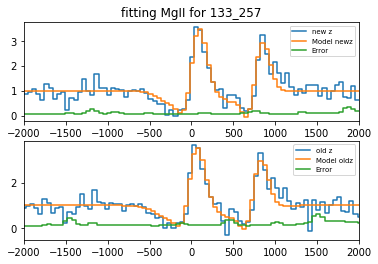

parameters with new z
[-124.46876638  175.90998388    1.10967092    3.33147846    0.79679149
    0.51676786  197.17079836   65.56466768]
parameters eror with new z
[47.64872783 24.91804347  0.15357583  2.15928795  0.11190374  0.12225972
 45.69821793 22.50871991]
parameters with old z
[-212.57468271   87.00542372    1.12170898    3.39131616    0.78872095
    0.51681824  197.70199956   66.46349132]
parameters eror with old z
[36.744833   21.53565639  0.10261437  1.80629314  0.09323325  0.11875669
 36.41071786 19.66781508]


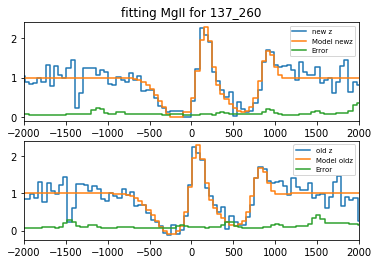

parameters with new z
[-165.60775186   72.1556597     1.17273914    2.25451522    0.94675328
    0.65797354  164.96905412   77.61056687]
parameters eror with new z
[20.78972307 33.46579132  0.08704373  0.98082764  0.06102774  0.10966364
 21.73814109 21.53585912]
parameters with old z
[-196.97238497   54.04508058    1.13352223    2.09648311    0.97084669
    0.66715381  165.0735768    74.28639849]
parameters eror with old z
[16.98803138 24.55668996  0.0569343   0.67142566  0.05637512  0.10070076
 17.27565275 17.39339374]


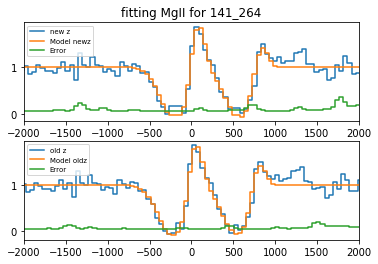

parameters with new z
[-75.49322514 164.30091679   0.77866462   3.93433902   1.41607601
   0.64717372 117.51210325  75.12957639]
parameters eror with new z
[49.37221824 31.96348946  0.20797682  1.39271705  0.59764624  0.20354105
 50.4681743  15.78959781]
parameters with old z
[-222.20482      62.26367016    0.80464548    3.4928522     1.94285384
    0.56331246   92.60452935   65.49742907]
parameters eror with old z
[19.32098844 11.72904563  0.24503666  0.45305833  0.62081941  0.11882811
 22.70842654 12.18694836]


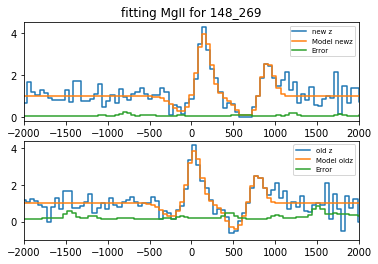

parameters with new z
[-104.19931387  122.78518686    0.99889023    2.70726669    1.16553186
    0.89143308  144.99163783   68.22456386]
parameters eror with new z
[36.57053408 33.43222887  0.10293691  1.44970665  0.19193696  0.21591953
 33.68691673 19.04673057]
parameters with old z
[-223.36075995   35.28423374    0.98641015    2.29035925    1.26047418
    0.83673291  135.36366791   62.85075803]
parameters eror with old z
[18.30544998 17.53036636  0.10321216  0.48997725  0.14980277  0.17165411
 20.21200417 13.36616858]


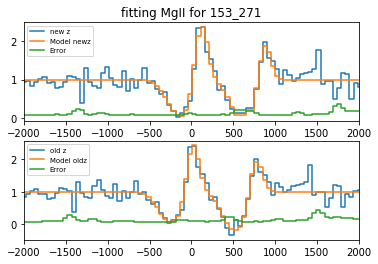

parameters with new z
[239.97454009 -74.05945862   1.00232625  -0.78355008  -0.54753417
  -1.75189899 -70.69775831   4.43155501]
parameters eror with new z
[3.15167165e+01 1.39895699e+08 6.51806255e-01 3.00898243e+06
 3.52243410e-01 2.33564538e+07 3.95568577e+01 1.25802261e+08]
parameters with old z
[-136.82666028  -13.21181349    1.04636223    6.31710886    0.94482588
    0.68520624  134.00395106   77.76029318]
parameters eror with old z
[35.73888548 83.66538374  0.10529278  7.66955831  0.12807187  0.26696147
 45.32251029 34.60379743]


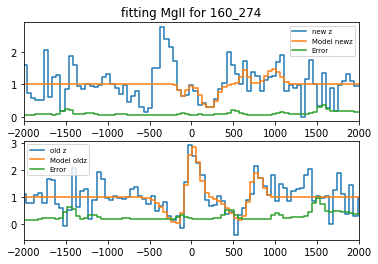

parameters with new z
[-16.96155628  50.53036876   0.99529972  11.22522086   0.95880908
   0.47522319 233.47892435 137.0344755 ]
parameters eror with new z
[2.63776617e+01 2.77013227e+01 3.35387621e-02 5.84607894e+00
 5.35235878e-02 2.11181576e-01 3.57429944e+01 2.36268900e+01]
parameters with old z
[-161.77587444 -102.9951039     1.01018458   12.20884189    0.96136663
    0.53083972  219.30172164  129.40049536]
parameters eror with old z
[2.05335043e+01 2.32031330e+01 2.41097401e-02 5.90664312e+00
 4.54963625e-02 1.98602586e-01 3.98905422e+01 2.06535697e+01]


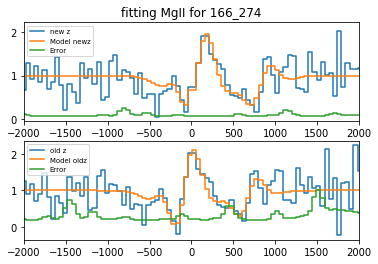

parameters with new z
[-16.46738933  72.25089455   0.72583583   1.85853853   0.90557686
   0.80457226 135.44997827 109.20040771]
parameters eror with new z
[53.12804393 73.95815374  0.22075797  1.45070789  0.175291    0.28703414
 26.60424324 33.23802009]
parameters with old z
[-167.27834382   46.12925409    0.41960243    0.78563989    0.72580336
    0.63115623  116.51042329   83.61608173]
parameters eror with old z
[179.08087905 108.88835302   0.20927044   0.94494441   0.29313322
   0.22402546 104.61094925  50.96672369]


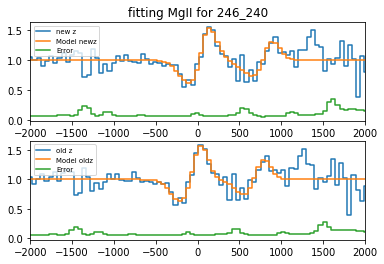

parameters with new z
[-72.35731362  31.87517961   0.97603433   4.99512008   0.96136854
   0.85561165 175.67214637 115.1009275 ]
parameters eror with new z
[13.64579997 23.21423078  0.02944251  1.30851459  0.02956782  0.09630011
 16.11516202 13.23114232]
parameters with old z
[-143.69811064  -39.1580486     0.97592672    4.96265677    0.96116353
    0.85893634  175.40237629  115.5014807 ]
parameters eror with old z
[13.04604962 22.26255235  0.02826415  1.25263363  0.0284025   0.0921917
 15.60169247 12.70833326]


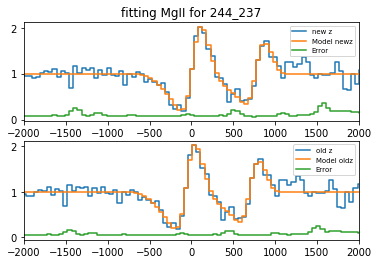

parameters with new z
[-179.813855    118.46301464    0.50746089    1.80654864    0.99755461
    0.73465671  200.55987229   69.85872366]
parameters eror with new z
[5.14607619e+01 8.76931257e+00 5.03212980e-02 5.15769074e-01
 1.16892821e-01 8.33843830e-02 4.43569386e+01 1.13735289e+01]
parameters with old z
[-209.61839093   85.29509525    0.50076214    1.80509975    1.0047209
    0.75181045  197.14469022   70.82343059]
parameters eror with old z
[5.16083976e+01 8.76966646e+00 4.88553944e-02 5.08685523e-01
 1.14867806e-01 8.01194581e-02 4.39261063e+01 1.09515350e+01]


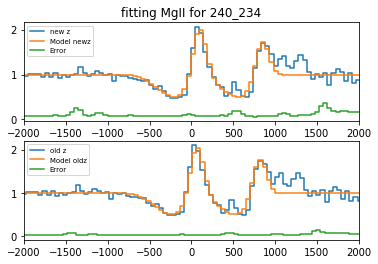

parameters with new z
[-136.86099297   94.27666794    0.84946881    2.53876201    0.87407199
    0.56866502  160.15328901   62.16413237]
parameters eror with new z
[63.98597271 28.54390322  0.11311861  1.67787342  0.13839775  0.15089543
 47.35975629 23.69231558]
parameters with old z
[-118.61794876  115.69165563    0.84636047    2.50818479    0.87000208
    0.58204197  162.05659584   62.42982014]
parameters eror with old z
[63.97534701 27.84725666  0.11158389  1.63681275  0.13794225  0.14728441
 47.65745493 23.57964726]


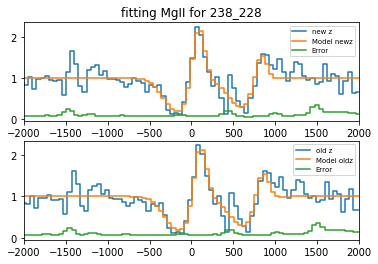

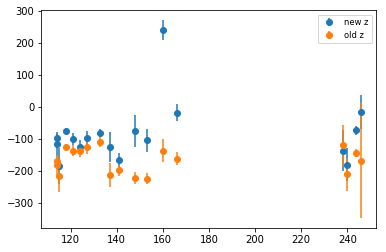

In [17]:
from scipy.optimize import curve_fit
vabs_new = []
vabs_new_er = []
vabs_old = []
vabs_old_er = []
vems_new = []
vems_new_er = []
vems_old = []
vems_old_er = []
for cx, cy, z in zip(xcen, ycen, zgal):
    datamg = ascii.read('/home/ahmed/astro/spectra/spectrum_mg_newz_'+str(cx)+'_'+str(cy)+'.dat')
    wave = datamg[0][:]
    wrest = datamg[1][:]
    flx_norm = datamg[5][:]
    flx_norm_er = datamg[6][:]
    datamg2 = ascii.read('/home/ahmed/astro/spectra/spectrum_mg_'+str(cx)+'_'+str(cy)+'.dat')
    wrest2 = datamg2[1][:]
    flx_norm2 = datamg2[5][:]
    flx_er_norm2 = datamg2[6][:]
    lam_center = [2796.351,2803.528]
    vel1 = u.veldiff(wrest,lam_center[0])  # new
    vel2 = u.veldiff(wrest2, lam_center[0]) # old
    popt1, pcov1 = curve_fit(m.modelMg,vel1, flx_norm, [0.,0.7,0.4,1.1,1.7,1.,150.,100.])
    perr1 = np.sqrt(np.diag(pcov1))
    vabs_new.append(popt1[0])
    vabs_new_er.append(perr1[0])
    vems_new.append(popt1[1])
    vems_new_er.append(perr1[1])
    print('parameters with new z')
    print(popt1)
    print('parameters eror with new z')
    print(perr1)
    
    popt2, pcov2 = curve_fit(m.modelMg,vel2, flx_norm2, [0.,0.7,0.4,1.1,1.7,1.,150.,100.])
    perr2 = np.sqrt(np.diag(pcov2))
    vabs_old.append(popt2[0])
    vabs_old_er.append(perr2[0])
    vems_old.append(popt2[1])
    vems_old_er.append(perr2[1])
    print('parameters with old z')
    print(popt2)
    print('parameters eror with old z')
    print(perr2)
    
    F1 = m.modelMg(vel1,*popt1)
    F2 = m.modelMg(vel2,*popt2)
    fig, ax= plt.subplots(2)
    #ax[0].set_title(''+str(cx)+'_'+str(cy)+'')
    #ax[0].step(wrest,flx_norm,label='new z')
    #ax[0].legend(loc=0, fontsize='small')
    ax[0].step(vel1, flx_norm, label='new z')
    ax[0].step(vel1, F1, label='Model newz')
    ax[0].step(vel1, flx_er_norm,label='Error')
    ax[0].set_title('fitting MgII for '+str(cx)+'_'+str(cy)+'')
    ax[0].set_xlim([-2000.,2000.])
    ax[0].legend(loc=0, fontsize='x-small')
    
    ax[1].step(vel2, flx_norm2, label='old z')
    ax[1].step(vel2, F2, label='Model oldz')
    ax[1].step(vel2, flx_er_norm2,label='Error')
    #ax[1].set_title('fitting MgII for '+str(cx)+'_'+str(cy)+'')
    ax[1].set_xlim([-2000.,2000.])
    ax[1].legend(loc=0, fontsize='x-small')
    plt.show()
    
fig1, ax1 = plt.subplots()
ax1.errorbar(xcen,vabs_new,yerr=vabs_new_er,fmt='o',label='new z')
ax1.errorbar(xcen,vabs_old,yerr=vabs_old_er,fmt='o',label='old z')
ax1.legend(loc=0,fontsize='small')
plt.show()